In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras

from slider import Preprocessing, ImageAnalysis, Settings

from IPython.display import clear_output

import cv2

In [7]:
photoelasticImageData, whiteLightImageData, forceData, trackingData, metadata = Preprocessing.loadSliderData(loadCachedData=True, saveCachedData=True)

Reading tracking data from cache: Cache/Tracking/shape0_01.pickle


In [23]:
imageSize = np.shape(ImageAnalysis.checkImageType(photoelasticImageData[0][3]))[0:2]
print(imageSize)

(700, 1276)


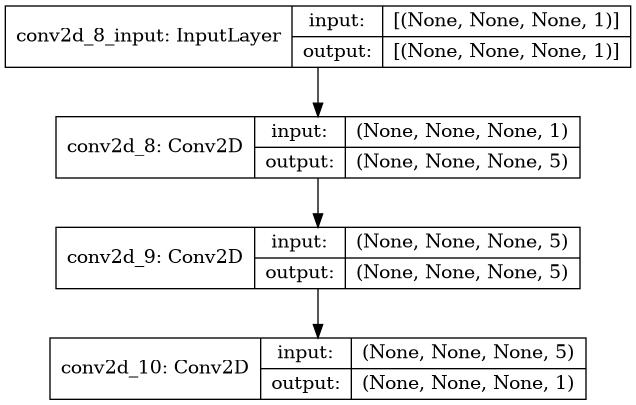

In [26]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(5, 10, input_shape=(None,None,1), padding='same'))
model.add(keras.layers.Conv2D(5, 10, padding='same'))
model.add(keras.layers.Conv2D(1, 10, padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

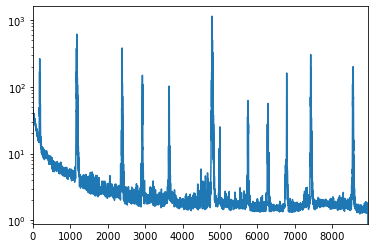

KeyboardInterrupt: 

In [29]:
image = ImageAnalysis.checkImageType(photoelasticImageData[0][0])[:,:,0:1]
error = np.zeros(len(photoelasticImageData[0])-1)

for i in range(len(photoelasticImageData[0])-1):
    nextImage = ImageAnalysis.checkImageType(photoelasticImageData[0][i+1])[:,:,0:1]
    error[i] = model.train_on_batch(np.array([image]), np.array([nextImage]))[0]
    
    image = nextImage
    
    clear_output(wait=True)
    plt.plot(error)
    plt.yscale('log')
    plt.xlim([0, i])
    plt.show()

In [8]:
#model.save('models/ImagePrediction_0')
model = keras.models.load_model('models/ImagePrediction_0')

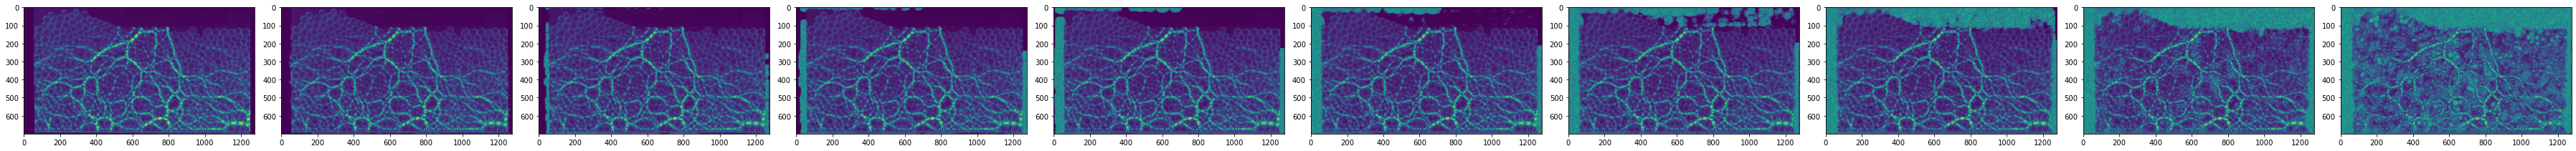

In [10]:
fps = 30
totalFrames = 10

fig, ax = plt.subplots(1, 10, figsize=(50, 5))

#initialFrame = ImageAnalysis.checkImageType(Settings.DATA_LOCATION + 'LabFrame_shape0_09/P00005.bmp')
initialFrame = ImageAnalysis.checkImageType(photoelasticImageData[0][-1000])
imageSize = np.shape(initialFrame)[0:2]

#writer = cv2.VideoWriter('videos/net_prediction_video.mp4',
#                     cv2.VideoWriter_fourcc(*'mp4v'),
#                     fps, imageSize)

frame = initialFrame[:,:,0:1]
ax[0].imshow(frame)
for i in range(totalFrames-1):
    
    # Convert from grayscale to rgb (still gray, but now 3 values)
    #rgbFrame = np.zeros([imageSize[0], imageSize[1], 3], dtype='uint8')
    #for i in range(3):
    #  rgbFrame[:,:,i] = frame[:,:,0]
    # And now write the image
    #writer.write(rgbFrame)
    
    # Predict the next frame
    frame = np.array(model(np.array([frame]))[0], dtype='uint8')
    ax[i+1].imshow(frame)
    
fig.tight_layout()
plt.savefig('images/image_prediction_sample.png')
plt.show()
#writer.release()

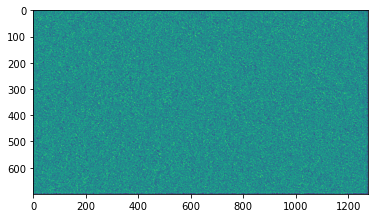

In [86]:
plt.imshow(frame)